In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

# %matplotlib notebook

data_path = "../../data/"
derrom_path = "../"

import sys

sys.path.append("ELPH/")
sys.path.append(derrom_path)

import ELPH
import ELPH_utils
import derrom



In [2]:
#global hyperparameters
kmax = 2.
n_kmax = 200

system = ELPH.ELPH(kmax=kmax,n_kmax=n_kmax)



In [4]:
init = system.get_init_cond_gauss(max_pos = 0.5/4, width = 0.025/4, density=0.05/4)

In [5]:
trajectory = system.get_full_trajectory(init)

In [7]:
derivs = np.zeros_like(trajectory[:,:system.n_kmax])

for k in range(derivs.shape[0]):
    derivs[k] = system.get_electron_derivs(trajectory[k])

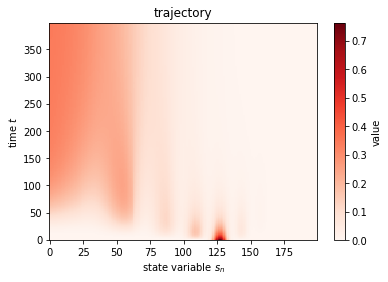

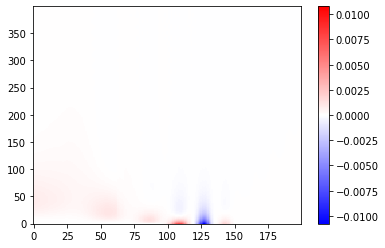

In [8]:
derrom.utils.plot_trajectory(trajectory[:,:system.n_kmax])

import matplotlib.colors as colors

plt.imshow(derivs, aspect='auto', interpolation='none',origin='lower',cmap='bwr', norm=colors.CenteredNorm(vcenter=0.0))
plt.colorbar()

plt.show()

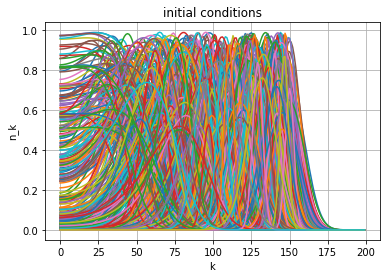

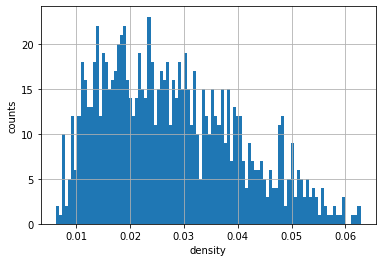

In [9]:
n_runs = 1000

rng = np.random.default_rng(817)

paras = np.zeros((n_runs,3))

paras[:,0] = rng.uniform(low=0.0/4, high=0.7/4, size=n_runs)
paras[:,1] = rng.uniform(low=0.02/4, high=0.1/4, size=n_runs)
paras[:,2] = 0.1/4 ### to be rescaled in the next block

inits = ELPH_utils.get_gaussian_inits(system, paras)


for r in range(n_runs):
    dist_max = np.amax(inits[r][:n_kmax])
#     inits[r][:n_kmax] *= 0.95 / dist_max
    inits[r][:n_kmax] *= rng.uniform(low=0.5, high=.99) / dist_max
    paras[r,2] = system.get_electron_density(inits[r][:n_kmax])

    
plt.grid()
for r in range(n_runs):
    plt.plot(inits[r][:n_kmax])
plt.xlabel('k')
plt.ylabel('n_k')
plt.title('initial conditions')
plt.show()

plt.grid()
plt.hist(paras[:,2],bins=n_runs//10)
plt.xlabel('density')
plt.ylabel('counts')
plt.show()

In [ ]:
derivs_list = []
trajectory_list = []

for j in range(len(inits)):
    print('run ', j+1)
    trajectory = system.get_full_trajectory(inits[j], tmax = 2000.0, n_tmax = 400)
    
    trajectory_list.append(trajectory[:,:system.n_kmax])
    
    derivs = np.zeros_like(trajectory[:,:system.n_kmax])
    for m in range(derivs.shape[0]):
        derivs[m] = system.get_electron_derivs(trajectory[m])
        
    derivs_list.append(derivs)
    

In [ ]:
# ELPH_utils.save_trajectories(trajectory_list, filename=data_path+'trajectories_n_kmax=200')
# ELPH_utils.save_trajectories(derivs_list, filename=data_path+'derivs_n_kmax=200')

In [ ]:
ind = 0

derrom.utils.plot_trajectory(trajectory_list[ind])

plt.imshow(derivs_list[ind], aspect='auto', interpolation='none',origin='lower',cmap='bwr', norm=colors.CenteredNorm(vcenter=0.0))
plt.colorbar()

plt.show()